In [1]:
from skimage import io
image = io.imread('https://upload.wikimedia.org/wikipedia/en/2/24/Lenna.png')

In [2]:
from skimage import color
imgray = color.rgb2gray(image)

In [3]:
import matplotlib.pyplot as plt

### Histogram

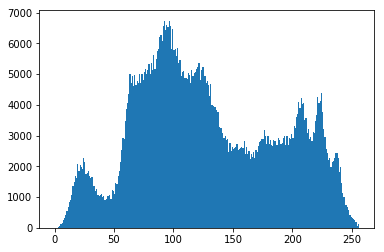

In [4]:
plt.hist(image.ravel(), 256, [0,256])
plt.show()

In [5]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

### Entropy

In [8]:
imentr = entropy(imgray, disk(10))

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


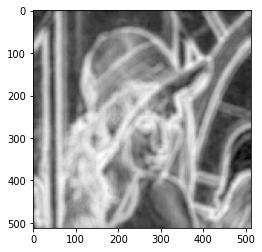

In [9]:
plt.imshow(imentr, cmap='gray')
plt.show()

### Image Segementation

In [10]:
from skimage import data
import numpy as np

In [11]:
camera = data.camera()

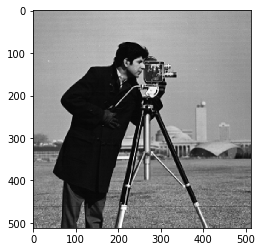

In [12]:
plt.imshow(camera, cmap='gray')
plt.show()

In [13]:
histo = np.histogram(camera, bins=np.arange(0, 256))

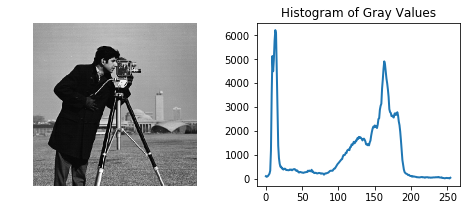

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(camera, cmap='gray')
axes[0].axis('off')
axes[1].plot(histo[1][:-1], histo[0], lw=2)
axes[1].set_title('Histogram of Gray Values')
plt.show()

#### Thresholding

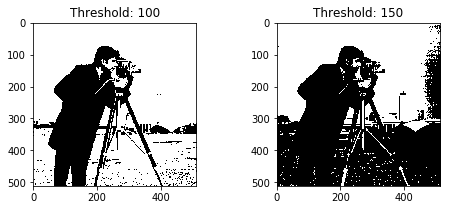

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
axes[0].imshow(camera>100, cmap = 'gray')
axes[0].set_title('Threshold: 100')

axes[1].imshow(camera>150, cmap='gray')
axes[1].set_title('Threshold: 150')

plt.show()

#### Edge Based Segmentation 

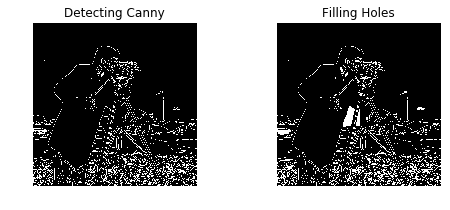

In [16]:
#Implementing Canny-based Edge Detection

from skimage.feature import canny
from scipy import ndimage as ndi

edges = canny(camera)
fill_coins = ndi.binary_fill_holes(edges)

fig, axes = plt.subplots(1, 2, figsize=(8,3))

axes[0].imshow(edges, cmap='gray')
axes[0].set_title('Detecting Canny')
axes[0].axis('off')

axes[1].imshow(fill_coins, cmap='gray')
axes[1].set_title('Filling Holes')
axes[1].axis('off')

plt.show()

#### Region Based Segmentation

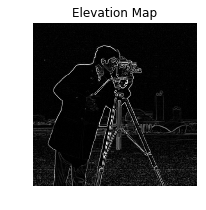

In [17]:
from skimage.filters import sobel

elevation_map = sobel(camera)

fig, axes = plt.subplots(figsize=(8,3))

axes.imshow(elevation_map, cmap='gray')
axes.set_title('Elevation Map')
axes.axis('Off')

plt.show()

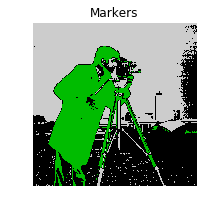

In [18]:
markers = np.zeros_like(camera)
markers[camera < 30] = 1
markers[camera > 150] = 2

fig, axes = plt.subplots(figsize=(8,3))
axes.imshow(markers, cmap='nipy_spectral')
axes.set_title('Markers')
axes.axis('Off')

plt.show()

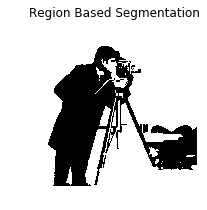

In [19]:
from skimage import morphology

segmentation = morphology.watershed(elevation_map, markers)

fig, axes = plt.subplots(figsize=(8,3))
axes.imshow(segmentation, cmap='gray')
axes.set_title('Region Based Segmentation')
axes.axis('Off')

plt.show()

### Historgram Equalization

Used to improve the contrast of the images

In [20]:
from skimage import data, img_as_float
from skimage import exposure

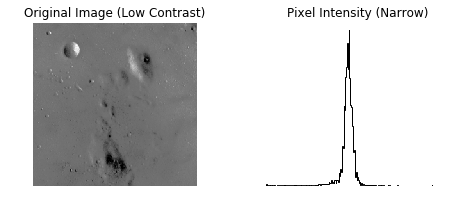

In [21]:
img = data.moon()

fig, axes = plt.subplots(1, 2, figsize = (8,3))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image (Low Contrast)')
axes[0].axis('off')

axes[1].hist(img.ravel(), bins=256, histtype='step', color='black')
axes[1].set_title('Pixel Intensity (Narrow)')
axes[1].axis('off')

plt.show()

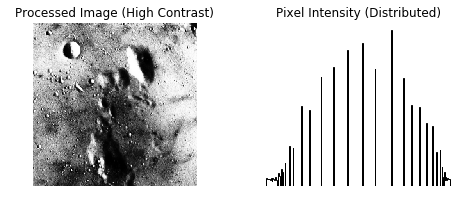

In [22]:
img_eq = exposure.equalize_hist(img)

fig, axes = plt.subplots(1, 2, figsize = (8,3))

axes[0].imshow(img_eq, cmap='gray')
axes[0].set_title('Processed Image (High Contrast)')
axes[0].axis('off')

axes[1].hist(img_eq.ravel(), bins=256, histtype='step', color='black')
axes[1].set_title('Pixel Intensity (Distributed)')
axes[1].axis('off')

plt.show()